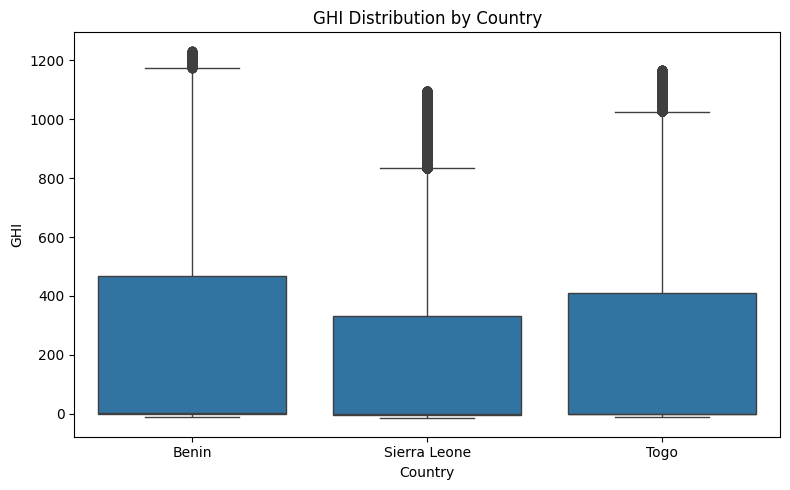

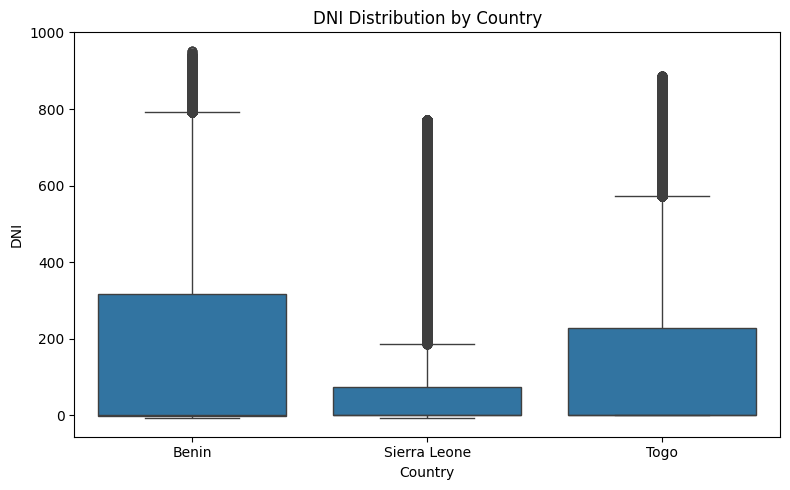

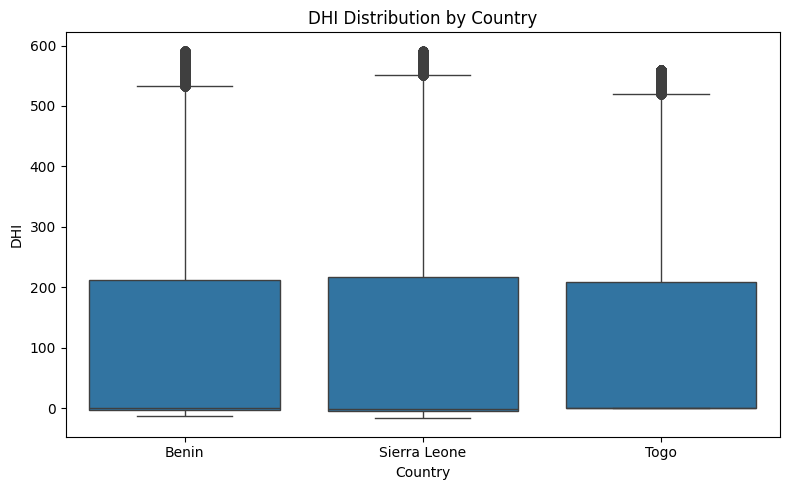


Summary Table for GHI, DNI, DHI:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          219.207480    0.0  314.079102  145.521615    0.0  245.524378   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          110.341512    1.0  148.911960  

One-way ANOVA for GHI: F-statistic = 3679.983, p-value = 0.000e+00



### Key Observations
- Benin shows the highest median GHI and relatively low variability.
- Sierra Leone has the lowest average GHI values across the board.
- Togo demonstrates moderate GHI but relatively higher DHI, indicating more diffuse radiation.


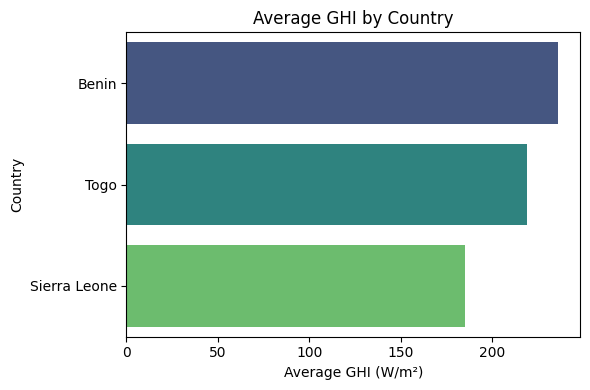

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load the cleaned datasets
benin = pd.read_csv("../data/benin_clean.csv")
sierraleone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# Add country column
benin["Country"] = "Benin"
sierraleone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Concatenate all into one DataFrame
df_all = pd.concat([benin, sierraleone, togo], ignore_index=True)

# Boxplots for GHI, DNI, DHI
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df_all)
    plt.title(f"{metric} Distribution by Country")
    plt.tight_layout()
    plt.show()

# Summary table
summary_table = df_all.groupby("Country")[metrics].agg(["mean", "median", "std"])
print("\nSummary Table for GHI, DNI, DHI:")
print(summary_table)

# One-way ANOVA for GHI
f_stat, p_value = f_oneway(
    benin["GHI"].dropna(),
    sierraleone["GHI"].dropna(),
    togo["GHI"].dropna()
)
print(f"\nOne-way ANOVA for GHI: F-statistic = {f_stat:.3f}, p-value = {p_value:.3e}")

# Key Observations (Markdown for notebook)
from IPython.display import Markdown, display
def md(text): display(Markdown(text))

md("""
### Key Observations
- Benin shows the highest median GHI and relatively low variability.
- Sierra Leone has the lowest average GHI values across the board.
- Togo demonstrates moderate GHI but relatively higher DHI, indicating more diffuse radiation.
""")

# Bar chart for average GHI per country
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(
    x=avg_ghi.values,
    y=avg_ghi.index,
    hue=avg_ghi.index,
    palette='viridis',
    dodge=False,
    legend=False
)
plt.title('Average GHI by Country')
plt.xlabel('Average GHI (W/m²)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
